In [1]:
# Data Set - https://drive.google.com/file/d/1QgW1lpwvLR8VvjfPuhlamNvNEmz7qIsS/view?usp=drive_link
# Data Repo - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing

In [2]:
# Import the libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraires
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# formating the notebook
pd.set_option('display.max_columns', None)

In [3]:
# Import the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/data.csv')
data.shape

(569, 33)

In [4]:
# Data sample
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Droping the last column
del data['Unnamed: 32']

In [6]:
# List of all columns
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
# Dropping the id column
del data['id']

# convert the target to binary
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [8]:
# Proportion of the target
data['diagnosis'].value_counts(normalize=True)*100

,proportion
diagnosis,
0,62.741652
1,37.258348


In [9]:
# Missing value check
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [10]:
# Splitting the data
x = data.iloc[:, data.columns != 'diagnosis']
y = data.iloc[:, data.columns == 'diagnosis']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# Random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# training score
rf.score(x_train, y_train)

1.0

In [13]:
# prediction
y_pred = rf.predict(x_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



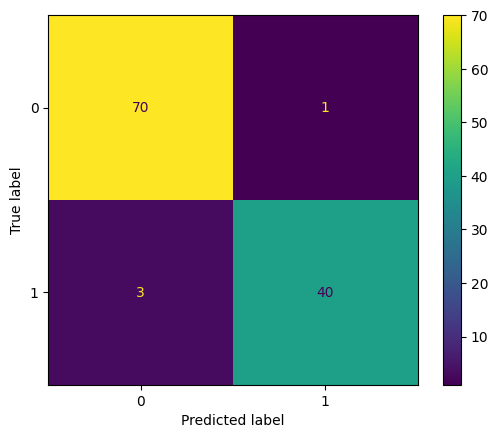

In [14]:
# Confusion Matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

In [15]:
# Hyper parameter tuning with gridsearch
rf = RandomForestClassifier(random_state=42)
np.random.seed(42)

start = time.time()

param_grid = {'bootstrap' : [True, False],
              'max_features' : ['auto', "sqrt", "log2", None],
              'criterion' : ['gini', 'entropy']}

hyper_fit = GridSearchCV(rf, cv=5, param_grid = param_grid, n_jobs=-1)
hyper_fit.fit(x_train, y_train)
print('Best Parameter using grid search:', hyper_fit.best_params_)

end = time.time()

Best Parameter using grid search: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}


In [16]:
print('Time taken for grid search:', round(end-start, 2))

Time taken for grid search: 61.51


In [17]:
# Setting the best parameter to the model
best_params = hyper_fit.best_params_
final_model = RandomForestClassifier(**best_params)

In [18]:
# OOB
final_model.set_params(warm_start= True, oob_score= True)

# Trees
min_estimator = 15
max_estimator = 1000

# error
error_rate = {}

# Iterating the rf for the trees
for trees in range(min_estimator, max_estimator+1):
    final_model.set_params(n_estimators=trees)
    final_model.fit(x_train, y_train)

    oob_error = 1-final_model.oob_score_
    error_rate[trees] = oob_error

In [19]:
# Coverting dictionary into pandas series for easy plotting
oob_data = pd.Series(error_rate)
oob_data.head()

,0
15,0.043956
16,0.043956
17,0.041758
18,0.039560
19,0.043956


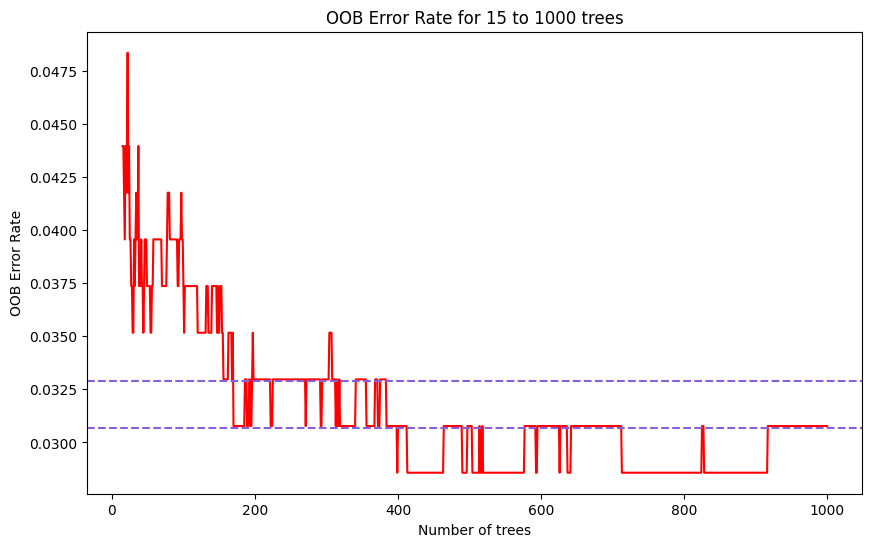

In [20]:
# Plotting the oob against the trees
plt.figure(figsize=(10, 6))
oob_data.plot(kind='line', color='red')
plt.xlabel('Number of trees')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate for 15 to 1000 trees')
plt.axhline(0.0329, color='#875FDB',linestyle='--')
plt.axhline(0.0307, color='#875FDB',linestyle='--')
plt.show()

In [21]:
print(oob_data.iloc[185:])

200     0.032967
201     0.032967
202     0.032967
203     0.032967
204     0.032967
          ...   
996     0.030769
997     0.030769
998     0.030769
999     0.030769
1000    0.030769
Length: 801, dtype: float64


In [22]:
# refining the trees via OOB
final_model.set_params(n_estimators=201, bootstrap=True, warm_start=False, oob_score=False)

# Model training
final_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=201)

In [23]:
# Training score
print('Training Score:', final_model.score(x_train, y_train))

Training Score: 1.0


In [24]:
# Prediction
final_y_pred = final_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



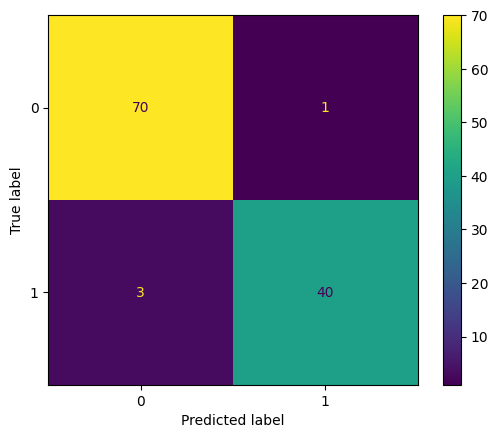

In [25]:
# Confusion Matrix and report
cm = ConfusionMatrixDisplay.from_predictions(y_test, final_y_pred)
report = classification_report(y_test, final_y_pred)
print(report)

In [26]:
# List of predictor variables
name_index = list(data.columns[1:])
name_index

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [27]:
# Variable Importance
importance = final_model.feature_importances_
indices = np.argsort(importance)[::-1]

In [28]:
# function to display variable importance based on GINI
def print_var_importance(importance, indices, name_index):
    print('Feature Ranks:')

    for val in range(0, indices.shape[0]):
        i = val
        print(f"{val+1}. The feature {name_index[indices[i]]} has a mean decrease in impurity of {round(importance[indices[val]], 4)}")

In [29]:
print_var_importance(importance, indices, name_index)

Feature Ranks:
1. The feature perimeter_worst has a mean decrease in impurity of 0.1369
2. The feature area_worst has a mean decrease in impurity of 0.1244
3. The feature concave points_worst has a mean decrease in impurity of 0.1239
4. The feature concave points_mean has a mean decrease in impurity of 0.1061
5. The feature radius_worst has a mean decrease in impurity of 0.0757
6. The feature area_mean has a mean decrease in impurity of 0.046
7. The feature concavity_worst has a mean decrease in impurity of 0.0441
8. The feature perimeter_mean has a mean decrease in impurity of 0.0415
9. The feature concavity_mean has a mean decrease in impurity of 0.0396
10. The feature area_se has a mean decrease in impurity of 0.0283
11. The feature radius_mean has a mean decrease in impurity of 0.0276
12. The feature texture_worst has a mean decrease in impurity of 0.0258
13. The feature compactness_worst has a mean decrease in impurity of 0.0256
14. The feature texture_mean has a mean decrease in 

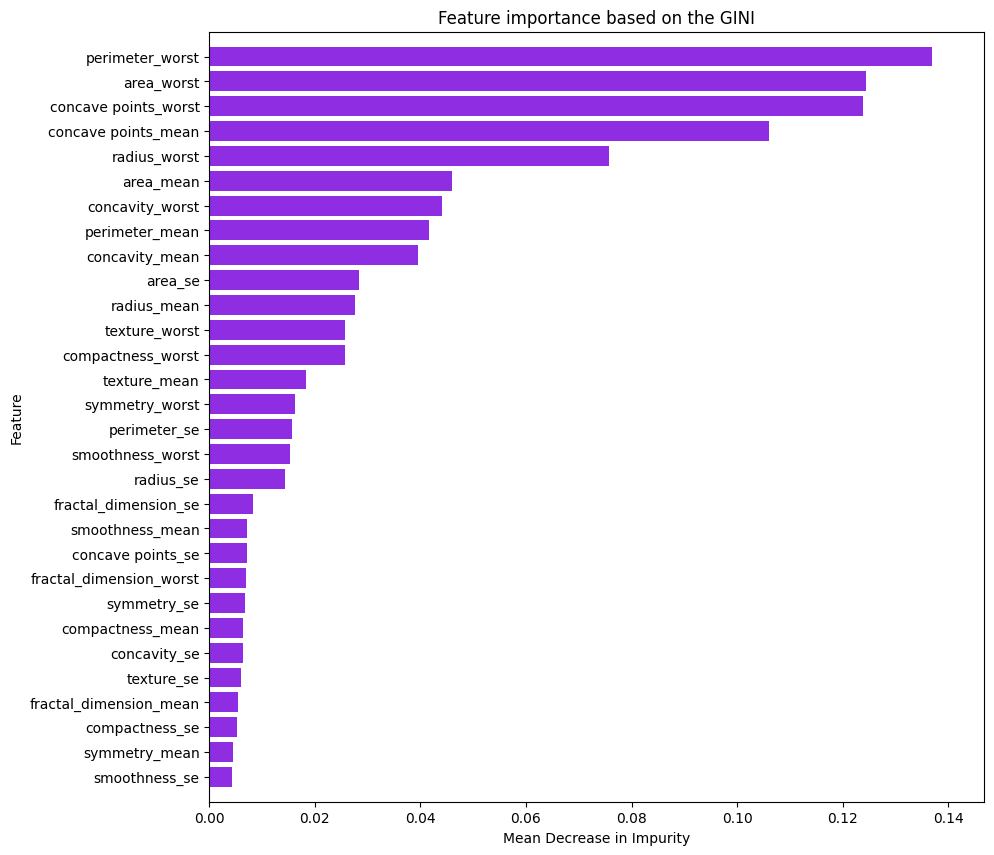

In [30]:
# Visual representation
index = np.arange(len(name_index))
importance_desc = sorted(importance)
feature_space = []

for i in range(indices.shape[0]-1, -1, -1):
    feature_space.append(name_index[indices[i]])

fig, ax = plt.subplots(figsize=(10,10))

plt.title('Feature importance based on the GINI')

# ax.set_axis_bgcolor('')
plt.barh(index,
         importance_desc,
         align='center',
         color='#8E2DE2')

plt.ylim(-1, 30)
plt.xlim(0, max(importance_desc) + 0.01)
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')

plt.yticks(index, feature_space)

plt.show()

In [31]:
pd.DataFrame({"name_index":name_index, "variable_importance":final_model.feature_importances_}).sort_values(by="variable_importance", ascending=False)

,name_index,variable_importance
22,perimeter_worst,0.136878
23,area_worst,0.124392
27,concave points_worst,0.123925
7,concave points_mean,0.106123
20,radius_worst,0.075725
3,area_mean,0.046029
26,concavity_worst,0.044115
2,perimeter_mean,0.041530
6,concavity_mean,0.039606
13,area_se,0.028298
